# Data Wrangling

In [0]:
!mkdir -p data/toyandgame

In [0]:
!wget -O data/toyandgame/Toys_and_Games_5.json.gz http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Toys_and_Games_5.json.gz

--2020-01-22 01:28:34--  http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Toys_and_Games_5.json.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42057555 (40M) [application/x-gzip]
Saving to: ‘data/toyandgame/Toys_and_Games_5.json.gz’

data/toyandgame/Toy 100%[===================>]  40.11M  7.18MB/s    in 8.5s    

2020-01-22 01:28:43 (4.69 MB/s) - ‘data/toyandgame/Toys_and_Games_5.json.gz’ saved [42057555/42057555]



In [0]:
import os
import json
import pandas as pd
import pickle
import numpy as np

In [0]:
!gzip data/toyandgame/Toys_and_Games_5.json.gz -d

In [0]:
!ls data/toyandgame

Toys_and_Games_5.json


In [0]:
TPS_DIR = 'data/toyandgame'
TP_file = os.path.join(TPS_DIR, 'Toys_and_Games_5.json')

f= open(TP_file)

In [0]:
users_id=[]
items_id=[]
ratings=[]
reviews=[]
np.random.seed(2017)

for line in f:
    js=json.loads(line)
    if str(js['reviewerID'])=='unknown':
        print("unknown")
        continue
    if str(js['asin'])=='unknown':
        print("unknown2")
        continue
    reviews.append(js['reviewText'])
    users_id.append(str(js['reviewerID'])+',')
    items_id.append(str(js['asin'])+',')
    ratings.append(str(js['overall']))


In [0]:
data=pd.DataFrame({'user_id':pd.Series(users_id),
                   'item_id':pd.Series(items_id),
                   'ratings':pd.Series(ratings),
                   'reviews':pd.Series(reviews)})[['user_id','item_id','ratings','reviews']]

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167597 entries, 0 to 167596
Data columns (total 4 columns):
user_id    167597 non-null object
item_id    167597 non-null object
ratings    167597 non-null object
reviews    167597 non-null object
dtypes: object(4)
memory usage: 5.1+ MB


In [0]:
data.head(20)

,user_id,item_id,ratings,reviews
0,"A1VXOAVRGKGEAK,","0439893577,",5.0,I like the item pricing. My granddaughter want...
1,"A8R62G708TSCM,","0439893577,",4.0,Love the magnet easel... great for moving to d...
2,"A21KH420DK0ICA,","0439893577,",5.0,Both sides are magnetic. A real plus when you...
3,"AR29QK6HPFYZ4,","0439893577,",5.0,Bought one a few years ago for my daughter and...
4,"ACCH8EOML6FN5,","0439893577,",4.0,I have a stainless steel refrigerator therefor...
5,"A1EDPGHC9EYBUN,","0439893577,",3.0,this is a nice magnetic board for the kids to ...
6,"A181ZNB42LISRZ,","0439893577,",3.0,This is just as I expected. It's not too sturd...
7,"A1RBEJ5UQ1RWAW,","0439893577,",5.0,My granddaughter really really likes this. I l...
8,"AFGGC7SIV964O,","0439893577,",4.0,This is good product to have with unlimited po...
9,"A2XU46XXNV19C8,","0439893577,",3.0,I keep this board on top of the hallway table ...


In [0]:
def get_count(tp, id):
    playcount_groupbyid = tp[[id, 'ratings']].groupby(id, as_index=False)
    count = playcount_groupbyid.size()
    return count
usercount, itemcount = get_count(data, 'user_id'), get_count(data, 'item_id')

In [0]:
usercount

user_id
A012468118FTQAINEI0OQ,     6
A0182108CPDLPRCXQUZQ,      8
A026961431MGW0616BRS3,     6
A034597326Z83X79S50FI,     7
A04295422T2ZG087R17FX,     5
                          ..
AZZLI36GZV6ZD,             9
AZZOZQ8AAHT64,             7
AZZT1ERHBSNQ8,            23
AZZTH6DJ0KSIP,             6
AZZYW4YOE1B6E,            19
Length: 19412, dtype: int64

In [0]:
itemcount

item_id
0439893577,    17
048645195X,    11
0545496470,     6
0615444172,     6
0670010936,    10
               ..
B00JV9HDP6,     8
B00K18YIOU,     5
B00KYMCJF8,     8
B00KZAROWC,     5
B00LBI9BKA,    22
Length: 11924, dtype: int64

In [0]:
unique_uid = usercount.index
unique_sid = itemcount.index
user2id = dict((uid, i) for (i, uid) in enumerate(unique_uid))
item2id = dict((sid, i) for (i, sid) in enumerate(unique_sid))

In [0]:
for i, key in enumerate(user2id):
    if i>=len(user2id)-5:
        print(i, key, user2id[key])

19407 AZZLI36GZV6ZD, 19407
19408 AZZOZQ8AAHT64, 19408
19409 AZZT1ERHBSNQ8, 19409
19410 AZZTH6DJ0KSIP, 19410
19411 AZZYW4YOE1B6E, 19411


In [0]:
for i, key in enumerate(item2id):
    if i>=len(item2id)-5:
        print(i, key, item2id[key])

11919 B00JV9HDP6, 11919
11920 B00K18YIOU, 11920
11921 B00KYMCJF8, 11921
11922 B00KZAROWC, 11922
11923 B00LBI9BKA, 11923


In [0]:
def numerize(tp):
    uid = list(map(lambda x: user2id[x], tp['user_id']))
    sid = list(map(lambda x: item2id[x], tp['item_id']))
    tp['user_id'] = uid
    tp['item_id'] = sid
    return tp

data=numerize(data)
tp_rating=data[['user_id','item_id','ratings']]

In [0]:
tp_rating.head(20)

,user_id,item_id,ratings
0,4516,0,5.0
1,15552,0,4.0
2,5307,0,5.0
3,18104,0,5.0
4,16040,0,4.0
5,1952,0,3.0
6,1114,0,3.0
7,3879,0,5.0
8,16454,0,4.0
9,9950,0,3.0


In [0]:
n_ratings = tp_rating.shape[0]
test = np.random.choice(n_ratings, size=int(0.20 * n_ratings), replace=False)
test_idx = np.zeros(n_ratings, dtype=bool)
test_idx[test] = True

tp_1 = tp_rating[test_idx]
tp_train= tp_rating[~test_idx]

In [0]:
tp_1.shape, tp_train.shape

((33519, 3), (134078, 3))

In [0]:
data2=data[test_idx]
data=data[~test_idx]

n_ratings = tp_1.shape[0]
test = np.random.choice(n_ratings, size=int(0.50 * n_ratings), replace=False)

test_idx = np.zeros(n_ratings, dtype=bool)
test_idx[test] = True

tp_test = tp_1[test_idx]
tp_valid = tp_1[~test_idx]

In [0]:
tp_train.shape, tp_valid.shape, tp_test.shape

((134078, 3), (16760, 3), (16759, 3))

In [0]:
tp_train

,user_id,item_id,ratings
1,15552,0,4.0
2,5307,0,5.0
3,18104,0,5.0
4,16040,0,4.0
5,1952,0,3.0
...,...,...,...
167592,1202,11923,5.0
167593,2536,11923,5.0
167594,14683,11923,5.0
167595,4532,11923,5.0


In [0]:
tp_valid

,user_id,item_id,ratings
0,4516,0,5.0
13,226,0,5.0
15,451,0,5.0
17,18044,1,5.0
25,18561,1,3.0
...,...,...,...
167547,4532,11918,5.0
167548,18723,11918,5.0
167555,4532,11919,5.0
167573,2027,11922,5.0


In [0]:
tp_test

,user_id,item_id,ratings
19,4685,1,5.0
21,7463,1,5.0
47,1610,4,3.0
53,7389,5,5.0
61,16384,6,4.0
...,...,...,...
167532,3708,11917,5.0
167545,1202,11918,5.0
167560,10789,11920,5.0
167575,7007,11923,5.0


In [0]:
tp_train.to_csv(os.path.join(TPS_DIR, 'toyandgame_train.csv'), index=False,header=None)
tp_valid.to_csv(os.path.join(TPS_DIR, 'toyandgame_valid.csv'), index=False,header=None)
tp_test.to_csv(os.path.join(TPS_DIR, 'toyandgame_test.csv'), index=False,header=None)

In [0]:
!ls data/toyandgame

toyandgame_test.csv   toyandgame_valid.csv
toyandgame_train.csv  Toys_and_Games_5.json


In [0]:
from google.colab import files

In [0]:
files.download(os.path.join(TPS_DIR, 'toyandgame_train.csv'))
files.download(os.path.join(TPS_DIR, 'toyandgame_valid.csv'))
files.download(os.path.join(TPS_DIR, 'toyandgame_test.csv'))

In [0]:
user_reviews={}
item_reviews={}
user_rid={}
item_rid={}

for i in data.values:
    if i[0] in user_reviews:
        user_reviews[i[0]].append(i[3])
        user_rid[i[0]].append(i[1])
    else:
        user_reviews[i[0]]=[i[3]]
        user_rid[i[0]]=[i[1]]
    if i[1] in item_reviews:
        item_reviews[i[1]].append(i[3])
        item_rid[i[1]].append(i[0])
    else:
        item_reviews[i[1]] = [i[3]]
        item_rid[i[1]]=[i[0]]


In [0]:
len(user_reviews), len(item_reviews), len(user_rid), len(item_rid)

(19411, 11924, 19411, 11924)

In [0]:
# for valid/test sets, add user/item to train set as "0" data
for i in data2.values:
    if i[0] in user_reviews:
        l=1
    else:
        user_rid[i[0]]=[0]
        user_reviews[i[0]]=['0']
        print('Added user {} to training set!'.format(i[0]))
    if i[1] in item_reviews:
        l=1
    else:
        item_rid[i[1]]=[0]
        item_reviews[i[1]] = ['0']
        print('Added item {} to training set!'.format(i[1]))
        

Added user 9996 to training set!


In [0]:
len(user_reviews), len(item_reviews), len(user_rid), len(item_rid)

(19412, 11924, 19412, 11924)

In [0]:
pickle.dump(user_reviews, open(os.path.join(TPS_DIR, 'user_review'), 'wb'))
pickle.dump(item_reviews, open(os.path.join(TPS_DIR, 'item_review'), 'wb'))
pickle.dump(user_rid, open(os.path.join(TPS_DIR, 'user_rid'), 'wb'))
pickle.dump(item_rid, open(os.path.join(TPS_DIR, 'item_rid'), 'wb'))

In [0]:
!ls data/toyandgame

item_review  toyandgame_test.csv   toyandgame_valid.csv   user_review
item_rid     toyandgame_train.csv  Toys_and_Games_5.json  user_rid


In [0]:
usercount, itemcount = get_count(data, 'user_id'), get_count(data, 'item_id')

print(np.sort(np.array(usercount.values)))
print(np.sort(np.array(itemcount.values)))

[  1   1   1 ... 123 131 445]
[  1   1   1 ... 173 206 243]


In [0]:
len(np.array(usercount.values)), len(np.array(itemcount.values))

(19411, 11924)

In [0]:
from matplotlib import pyplot as plt
%matplotlib inline

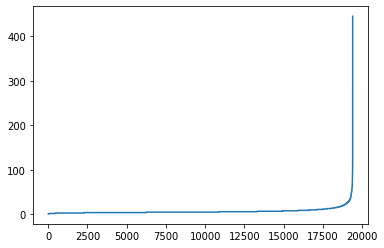

In [0]:
plt.plot(np.sort(np.array(usercount.values)))

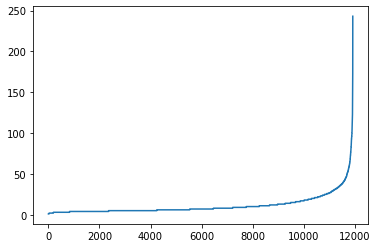

In [0]:
plt.plot(np.sort(np.array(itemcount.values)))

In [0]:
!zip -r data/toyandgame/toyandgame.zip data/toyandgame/item_review data/toyandgame/item_rid data/toyandgame/user_review data/toyandgame/user_rid

  adding: data/toyandgame/item_review (deflated 63%)
  adding: data/toyandgame/item_rid (deflated 30%)
  adding: data/toyandgame/user_review (deflated 63%)
  adding: data/toyandgame/user_rid (deflated 37%)


In [0]:
files.download('toyandgame.zip')

In [0]:
f.close()

# Data Preprocessing

In [0]:
!ls data/toyandgame

item_review  toyandgame_test.csv   toyandgame_valid.csv  user_rid
item_rid     toyandgame_train.csv  user_review


In [0]:
import numpy as np
import re
import itertools
from collections import Counter

import tensorflow as tf
import csv
import pickle
import os

In [0]:
tf.__version__

'1.15.0'

In [0]:
def clean_str(string):
    """
    Tokenization/string cleaning for all datasets except for SST.
    Original taken from https://github.com/yoonkim/CNN_sentence/blob/master/process_data.py
    """
    string = re.sub(r"[^A-Za-z]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    return string.strip().lower()

In [0]:
def pad_sentences(u_text, u_len, u2_len, padding_word="<PAD/>"):
    """
    Pads all sentences to the same length. The length is defined by the longest sentence.
    Returns padded sentences.
    """
    review_num = u_len
    review_len = u2_len

    u_text2 = {}
    for i in u_text.keys():
        u_reviews = u_text[i]
        padded_u_train = []
        for ri in range(review_num):
            if ri < len(u_reviews):
                sentence = u_reviews[ri]
                if review_len > len(sentence):
                    num_padding = review_len - len(sentence)
                    new_sentence = sentence + [padding_word] * num_padding
                    padded_u_train.append(new_sentence)
                else:
                    new_sentence = sentence[:review_len]
                    padded_u_train.append(new_sentence)
            else:
                new_sentence = [padding_word] * review_len
                padded_u_train.append(new_sentence)
        u_text2[i] = padded_u_train

    return u_text2

In [0]:
def pad_reviewid(u_train, u_valid, u_len, pad_num):
    pad_u_train = []
    for i in range(len(u_train)):
        x = u_train[i]
        while u_len > len(x):
            x.append(pad_num)
        if u_len < len(x):
            x = x[:u_len]
        pad_u_train.append(x)
    
    pad_u_valid = []
    for i in range(len(u_valid)):
        x = u_valid[i]
        while u_len > len(x):
            x.append(pad_num)
        if u_len < len(x):
            x = x[:u_len]
        pad_u_valid.append(x)
        
    return pad_u_train, pad_u_valid

In [0]:
def build_vocab(sentences1, sentences2):
    """
    Builds a vocabulary mapping from word to index based on the sentences.
    Returns vocabulary mapping and inverse vocabulary mapping.
    """
    # Build vocabulary
    word_counts1 = Counter(itertools.chain(*sentences1))
    # Mapping from index to word
    vocabulary_inv1 = [x[0] for x in word_counts1.most_common()]
    vocabulary_inv1 = sorted(vocabulary_inv1)
    # Mapping from word to index
    vocabulary1 = {x: i for i, x in enumerate(vocabulary_inv1)}

    word_counts2 = Counter(itertools.chain(*sentences2))
    # Mapping from index to word
    vocabulary_inv2 = [x[0] for x in word_counts2.most_common()]
    vocabulary_inv2 = sorted(vocabulary_inv2)
    # Mapping from word to index
    vocabulary2 = {x: i for i, x in enumerate(vocabulary_inv2)}
    return (vocabulary1, vocabulary_inv1, vocabulary2, vocabulary_inv2)


In [0]:
def build_input_data(u_text, i_text, vocabulary_u, vocabulary_i):
    """
    Maps sentencs and labels to vectors based on a vocabulary.
    """
    l = len(u_text)
    u_text2 = {}
    for i in u_text.keys():
        u_reviews = u_text[i]
        u_rev_new = np.array([[vocabulary_u[word] for word in words] for words in u_reviews])
        u_text2[i] = u_rev_new
    l = len(i_text)
    i_text2 = {}
    for j in i_text.keys():
        i_reviews = i_text[j]
        i_rev_new = np.array([[vocabulary_i[word] for word in words] for words in i_reviews])
        i_text2[j] = i_rev_new
    return u_text2, i_text2

In [0]:
def load_data_and_labels(train_data, valid_data, user_review, item_review, user_rid, item_rid, stopwords):
    """
    Loads MR polarity data from files, splits the data into words and generates labels.
    Returns split sentences and labels.
    """
    # Load data from files

    f_train = open(train_data, 'r')
    f1 = open(user_review, 'rb')
    f2 = open(item_review, 'rb')
    f3 = open(user_rid, 'rb')
    f4 = open(item_rid, 'rb')

    user_reviews = pickle.load(f1)
    item_reviews = pickle.load(f2)
    user_rids = pickle.load(f3)
    item_rids = pickle.load(f4)

    print("train")
    reid_user_train = []
    reid_item_train = []
    uid_train = []
    iid_train = []
    y_train = []

    u_text = {}
    u_rid = {}
    i_text = {}
    i_rid = {}

    for line in f_train:
        line = line.split(',')
        uid_train.append(int(line[0]))
        iid_train.append(int(line[1]))
        if int(line[0]) in u_text:
            reid_user_train.append(u_rid[int(line[0])])
        else:
            u_text[int(line[0])] = []
            for s in user_reviews[int(line[0])]:
                s1 = clean_str(s)
                s1 = s1.split(" ")
                u_text[int(line[0])].append(s1)
            u_rid[int(line[0])] = []
            for s in user_rids[int(line[0])]:
                u_rid[int(line[0])].append(int(s))
            reid_user_train.append(u_rid[int(line[0])])

        if int(line[1]) in i_text:
            reid_item_train.append(i_rid[int(line[1])])
        else:
            i_text[int(line[1])] = []
            for s in item_reviews[int(line[1])]:
                s1 = clean_str(s)
                s1 = s1.split(" ")
                i_text[int(line[1])].append(s1)
            i_rid[int(line[1])] = []
            for s in item_rids[int(line[1])]:
                i_rid[int(line[1])].append(int(s))
            reid_item_train.append(i_rid[int(line[1])])

        y_train.append(float(line[2]))

    print("valid")
    f_valid = open(valid_data, 'r')

    reid_user_valid = []
    reid_item_valid = []
    uid_valid = []
    iid_valid = []
    y_valid = []

    for line in f_valid:
        line = line.split(',')
        uid_valid.append(int(line[0]))
        iid_valid.append(int(line[1]))
        if int(line[0]) in u_text:
            reid_user_valid.append(u_rid[int(line[0])])
        else:
            print("Added user", int(line[0]))
            u_text[int(line[0])] = [['<PAD/>']]
            u_rid[int(line[0])] = [int(0)]
            reid_user_valid.append(u_rid[int(line[0])])

        if int(line[1]) in i_text:
            reid_item_valid.append(i_rid[int(line[1])])
        else:
            print("Added item", int(line[1]))
            i_text[int(line[1])] = [['<PAD/>']]
            i_rid[int(line[1])] = [int(0)]
            reid_item_valid.append(i_rid[int(line[1])])

        y_valid.append(float(line[2]))

    print("len")
    review_num_u = np.array([len(x) for x in u_text.values()])
    x = np.sort(review_num_u)
    u_len = x[int(0.9 * len(review_num_u)) - 1]
    review_len_u = np.array([len(j) for i in u_text.values() for j in i])
    x2 = np.sort(review_len_u)
    u2_len = x2[int(0.9 * len(review_len_u)) - 1]
    review_num_i = np.array([len(x) for x in i_text.values()])
    y = np.sort(review_num_i)
    i_len = y[int(0.9 * len(review_num_i)) - 1]
    review_len_i = np.array([len(j) for i in i_text.values() for j in i])
    y2 = np.sort(review_len_i)
    i2_len = y2[int(0.9 * len(review_len_i)) - 1]

    print("u_len:", u_len)
    print("i_len:", i_len)
    print("u2_len:", u2_len)
    print("i2_len:", i2_len)
    user_num = len(u_text)
    item_num = len(i_text)
    print("user_num:", user_num)
    print("item_num:", item_num)
    return (u_text, i_text, y_train, y_valid, u_len, i_len, u2_len, i2_len,\
            uid_train, iid_train, uid_valid, iid_valid, user_num, item_num,\
            reid_user_train, reid_item_train, reid_user_valid, reid_item_valid)

In [0]:
def load_and_preprocess_data(train_data, valid_data, user_review, item_review, user_rid, item_rid, stopwords):
    """
    Loads and preprocessed data for the MR dataset.
    Returns input vectors, labels, vocabulary, and inverse vocabulary.
    """
    # Load and preprocess data

    u_text, i_text, y_train, y_valid, u_len, i_len, u2_len, i2_len,\
    uid_train, iid_train, uid_valid, iid_valid, user_num, item_num,\
    reid_user_train, reid_item_train, reid_user_valid, reid_item_valid\
    = load_data_and_labels(train_data, valid_data, user_review, item_review, user_rid, item_rid, stopwords)
    print('load data done')

    u_text = pad_sentences(u_text, u_len, u2_len)
    reid_user_train, reid_user_valid = pad_reviewid(reid_user_train, reid_user_valid, u_len, item_num + 1)
    print('pad user done')

    i_text = pad_sentences(i_text, i_len, i2_len)
    reid_item_train, reid_item_valid = pad_reviewid(reid_item_train, reid_item_valid, i_len, user_num + 1)
    print('pad item done')

    user_voc = [xx for x in u_text.values() for xx in x]
    item_voc = [xx for x in i_text.values() for xx in x]    
    vocabulary_user, vocabulary_inv_user, vocabulary_item, vocabulary_inv_item = build_vocab(user_voc, item_voc)
    print(len(vocabulary_user))
    print(len(vocabulary_item))

    u_text, i_text = build_input_data(u_text, i_text, vocabulary_user, vocabulary_item)
    y_train = np.array(y_train)
    y_valid = np.array(y_valid)
    uid_train = np.array(uid_train)
    uid_valid = np.array(uid_valid)
    iid_train = np.array(iid_train)
    iid_valid = np.array(iid_valid)
    reid_user_train = np.array(reid_user_train)
    reid_user_valid = np.array(reid_user_valid)
    reid_item_train = np.array(reid_item_train)
    reid_item_valid = np.array(reid_item_valid)

    return (u_text, i_text, y_train, y_valid,\
            vocabulary_user, vocabulary_inv_user, vocabulary_item, vocabulary_inv_item,\
            uid_train, iid_train, uid_valid, iid_valid, user_num, item_num,\
            reid_user_train, reid_item_train, reid_user_valid, reid_item_valid)

In [0]:
TPS_DIR = 'data/toyandgame'

In [0]:
train_data = os.path.join(TPS_DIR, 'toyandgame_train.csv')
valid_data = os.path.join(TPS_DIR, 'toyandgame_valid.csv')
user_review = os.path.join(TPS_DIR, 'user_review')
item_review = os.path.join(TPS_DIR, 'item_review')
user_rid = os.path.join(TPS_DIR, 'user_rid')
item_rid = os.path.join(TPS_DIR, 'item_rid')

In [0]:
u_text, i_text, y_train, y_valid,\
vocabulary_user, vocabulary_inv_user, vocabulary_item, vocabulary_inv_item,\
uid_train, iid_train, uid_valid, iid_valid, user_num, item_num,\
reid_user_train, reid_item_train, reid_user_valid, reid_item_valid\
= load_and_preprocess_data(train_data, valid_data, user_review, item_review, user_rid, item_rid, None)

train
valid
Added user 9996
len
u_len: 11
i_len: 23
u2_len: 224
i2_len: 224
user_num: 19412
item_num: 11924
load data done
pad user done
pad item done
56456
59414


In [0]:
np.random.seed(2017)
shuffle_indices = np.random.permutation(np.arange(len(y_train)))

In [0]:
len(y_train), len(uid_train), len(iid_train), len(reid_user_train), len(reid_item_train)

(134078, 134078, 134078, 134078, 134078)

In [0]:
len(y_valid), len(uid_valid), len(iid_valid), len(reid_user_valid), len(reid_item_valid)

(16760, 16760, 16760, 16760, 16760)

In [0]:
userid_train = uid_train[shuffle_indices]
itemid_train = iid_train[shuffle_indices]
y_train = y_train[shuffle_indices]
reid_user_train = reid_user_train[shuffle_indices]
reid_item_train = reid_item_train[shuffle_indices]

In [0]:
y_train = y_train[:, np.newaxis]
y_valid = y_valid[:, np.newaxis]

userid_train = userid_train[:, np.newaxis]
itemid_train = itemid_train[:, np.newaxis]
userid_valid = uid_valid[:, np.newaxis]
itemid_valid = iid_valid[:, np.newaxis]

In [0]:
batches_train = list(zip(userid_train, itemid_train, reid_user_train, reid_item_train, y_train))
batches_test = list(zip(userid_valid, itemid_valid, reid_user_valid, reid_item_valid, y_valid))
print('write begin')
output = open(os.path.join(TPS_DIR, 'toyandgame.train'), 'wb')
pickle.dump(batches_train, output)
output = open(os.path.join(TPS_DIR, 'toyandgame.test'), 'wb')
pickle.dump(batches_test, output)

write begin


In [0]:
para = {}
para['user_num'] = user_num
para['item_num'] = item_num
para['review_num_u'] = u_text[0].shape[0]
para['review_num_i'] = i_text[0].shape[0]
para['review_len_u'] = u_text[1].shape[1]
para['review_len_i'] = i_text[1].shape[1]
para['user_vocab'] = vocabulary_user
para['item_vocab'] = vocabulary_item
para['train_length'] = len(y_train)
para['test_length'] = len(y_valid)
para['u_text'] = u_text
para['i_text'] = i_text
output = open(os.path.join(TPS_DIR, 'toyandgame.para'), 'wb')

# Pickle dictionary using protocol 0.
pickle.dump(para, output)

In [0]:
!ls -l data/toyandgame

total 1089372
-rw-r--r-- 1 root root  73293404 Jan 21 20:32 item_review
-rw-r--r-- 1 root root    530690 Jan 21 20:32 item_rid
-rw-r--r-- 1 root root 878821228 Jan 22 21:52 toyandgame.para
-rw-r--r-- 1 root root   9602953 Jan 22 21:33 toyandgame.test
-rw-r--r-- 1 root root    243036 Jan 22 17:29 toyandgame_test.csv
-rw-r--r-- 1 root root  76826403 Jan 22 21:33 toyandgame.train
-rw-r--r-- 1 root root   1942775 Jan 22 17:29 toyandgame_train.csv
-rw-r--r-- 1 root root    242865 Jan 22 17:29 toyandgame_valid.csv
-rw-r--r-- 1 root root  73375772 Jan 21 20:32 user_review
-rw-r--r-- 1 root root    611496 Jan 21 20:32 user_rid


In [0]:
!zip -r data/toyandgame/toyandgame_batch_para.zip data/toyandgame/toyandgame.train data/toyandgame/toyandgame.test data/toyandgame/toyandgame.para

  adding: data/toyandgame/toyandgame.train (deflated 71%)
  adding: data/toyandgame/toyandgame.test (deflated 77%)
  adding: data/toyandgame/toyandgame.para (deflated 95%)
